# PUBG绝地求生双排的获胜因素和获胜策略

数据来源：kaggle（PUBG官方API爬取）https://www.kaggle.com/c/pubg-finish-placement-prediction/data

<p>PUBG是由蓝洞开发并发行的一款射击游戏，大逃杀玩法是其红极一时的主要原因。在该游戏中,玩家从飞机上空降落到地图上的不同位置，从建筑物中寻找随机分布的武器、弹药、护甲和医疗用品，并向不断缩小的安全区内转移（安全区外会不断掉血）。在此过程中玩家需要保存自己、消灭对手，直到留下最后一个团队。

<p>本部分只研究双排的比赛（即matchType为Duo）。

******

## 一、数据预处理
<p>导入双排数据集dataDuo_V2.csv

In [1]:
import pandas as pd
# 导入数据
data = pd.read_csv('dataDuo_V2.csv')
print(data.columns)
data.head()

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlacePerc',
       'totalDistance', 'headshot_rate', 'kill_rate', 'playersInGroup',
       'weaponsPerDistance', 'healsPerDistance', 'killsPerDistance',
       'distance_over_weapons', 'distance_over_heals', 'distance_over_kills',
       'healthitems', 'skill'],
      dtype='object')


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,1.02,0,69.3600,0.00,0.00,0,47.94,0.00,0.00,0.000,...,0.000000,2,0.012361,0.000000,0.000000,80.90,0.000000,0.000000,0,0.00
1,0.00,0,144.7950,1.05,0.00,0,67.20,0.00,0.00,0.000,...,0.000000,3,0.002214,0.000000,0.000000,451.70,0.000000,0.000000,0,0.00
2,0.00,0,84.7455,1.05,0.00,0,75.60,0.00,0.00,0.000,...,0.000000,2,0.047574,0.000000,0.000000,21.02,0.000000,0.000000,0,0.00
3,0.00,4,282.5550,0.00,1.05,8,18.90,2.10,1.05,7.438,...,1.000000,2,0.001104,0.004459,0.001171,905.60,566.000000,2156.190476,12,2.10
4,0.00,1,198.0690,1.03,2.06,3,15.45,2.06,1.03,280.600,...,0.666667,2,0.001112,0.002373,0.001630,899.00,1198.666667,1745.631068,4,3.09


### 1、数据清洗

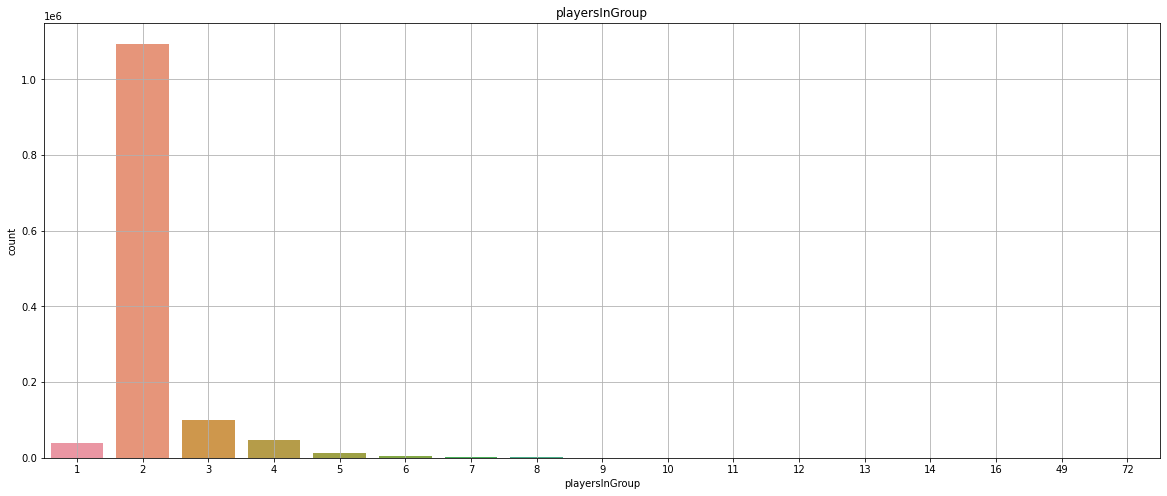

In [2]:
# 查看是否存在队伍人数大于2的异常数据
# 绘制队伍人数的直方图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(data['playersInGroup'])
plt.title('playersInGroup')
plt.grid()
plt.show()

In [3]:
# 删除队伍人数大于2的异常数据
data = data[data['playersInGroup'] <= 2]
data.shape

(1133356, 32)

### 2、抽取样本
（5万）

In [4]:
data_sample = data.sample(n=50000, replace=False, weights=None, random_state=None, axis=None).reset_index(drop=True)
data_sample.to_csv('sampleDuo_V2.csv', index=False)
data_sample

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,0.00,0,57.6828,0.00,0.00,0,91.56,0.00,0.00,0.00,...,0.0,2,0.008084,0.000000,0.000000,123.700000,0.0,0.000000,0,0.00
1,0.00,0,143.6240,1.04,0.00,0,32.24,1.04,1.04,67.56,...,0.5,2,0.012780,0.000000,0.006645,78.250000,0.0,150.480769,0,1.04
2,1.02,1,186.1500,1.02,0.00,2,39.78,0.00,0.00,0.00,...,0.0,2,0.000863,0.000637,0.000000,1158.750000,2317.5,0.000000,3,0.00
3,2.06,3,293.2410,1.03,1.03,1,18.54,2.06,2.06,57.12,...,0.4,2,0.001181,0.000525,0.001081,846.766667,2540.3,1233.155340,4,3.09
4,0.00,0,19.1152,0.00,0.00,0,75.92,0.00,0.00,0.00,...,0.0,2,0.008536,0.000000,0.000000,117.150000,0.0,0.000000,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.00,0,23.6844,2.04,0.00,5,59.16,0.00,0.00,0.00,...,0.0,2,0.001449,0.003959,0.000000,690.000000,552.0,0.000000,5,0.00
49996,1.04,0,0.0000,0.00,0.00,0,85.28,0.00,0.00,0.00,...,0.0,2,0.016384,0.000000,0.000000,61.033333,0.0,0.000000,0,0.00
49997,3.12,0,400.6080,1.04,0.00,0,32.24,1.04,1.04,23.78,...,0.2,2,0.003252,0.000000,0.001127,307.533333,0.0,887.115385,0,1.04
49998,0.00,0,78.2916,1.06,0.00,12,34.98,1.06,1.06,61.03,...,0.5,2,0.003181,0.009174,0.000810,314.400000,131.0,1483.018868,12,1.06


## 三、预测模型

### 1、全数据预测

In [23]:
import pandas as pd
data_pre = pd.read_csv('sampleDuo_V2.csv')
print(data_pre.columns.values)

['assists' 'boosts' 'damageDealt' 'DBNOs' 'headshotKills' 'heals'
 'killPlace' 'kills' 'killStreaks' 'longestKill' 'matchDuration' 'revives'
 'rideDistance' 'roadKills' 'swimDistance' 'teamKills' 'vehicleDestroys'
 'walkDistance' 'weaponsAcquired' 'winPlacePerc' 'totalDistance'
 'headshot_rate' 'kill_rate' 'playersInGroup' 'weaponsPerDistance'
 'healsPerDistance' 'killsPerDistance' 'distance_over_weapons'
 'distance_over_heals' 'distance_over_kills' 'healthitems' 'skill']


In [24]:
# 删除与游戏玩家无关的游戏时长
data_pre = data_pre.drop(columns=['matchDuration'])

In [25]:
# 数据集分割
from sklearn.model_selection import train_test_split
x = data_pre.drop(columns=['winPlacePerc'])
y = data_pre['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)
# 标准化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train_ss=ss.transform(x_train)
x_test_ss=ss.transform(x_test)

#### 神经网络模型

In [26]:
import keras
#30个变量x
model = keras.models.Sequential()#初始化
model.add(keras.layers.Dense(60, activation='relu',input_shape = (x_train_ss.shape[-1],)))
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(240, activation='relu'))
# 网络的最后一层只有一个单元,没有激活,是一个线性层
model.add(keras.layers.Dense(1))
# 定义损失函数
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(x_train_ss,y_train,validation_data=(x_test_ss, y_test),epochs=30)#对模型进行训练

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 3s 64us/step - loss: 0.0167 - mae: 0.0848 - val_loss: 0.0082 - val_mae: 0.0655
Epoch 2/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.0076 - mae: 0.0637 - val_loss: 0.0072 - val_mae: 0.0607
Epoch 3/30
40000/40000 [==============================] - 2s 62us/step - loss: 0.0068 - mae: 0.0607 - val_loss: 0.0066 - val_mae: 0.0589
Epoch 4/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.0065 - mae: 0.0593 - val_loss: 0.0063 - val_mae: 0.0585
Epoch 5/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.0064 - mae: 0.0586 - val_loss: 0.0063 - val_mae: 0.0575
Epoch 6/30
40000/40000 [==============================] - 3s 67us/step - loss: 0.0062 - mae: 0.0578 - val_loss: 0.0063 - val_mae: 0.0583
Epoch 7/30
40000/40000 [==============================] - 3s 75us/step - loss: 0.0062 - mae: 0.0574 - val_loss: 0.0068 - val_mae

#### 线性回归模型

In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linear = linear_model.LinearRegression() #实例化
linear.fit(x_train_ss, y_train) #训练模型
y_pred_linear = linear.predict(x_test_ss) #预测

print('linear_mae:',mean_absolute_error(y_test, y_pred_linear))
print('linear_R方:',r2_score(y_test, y_pred_linear))

linear_mae: 0.07451391528121407
linear_R方: 0.8789606356755976


#### 决策树模型

In [28]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train_ss,y_train)
y_pred_dt = dt.predict(x_test_ss)
print('决策树_MAE：',mean_absolute_error(y_test,y_pred_dt))
print('决策树_R方：',r2_score(y_test,y_pred_dt))
print('决策树参数： \n',dt.feature_importances_)

决策树_MAE： 0.07850654
决策树_R方： 0.8626653586668769
决策树参数： 
 [1.87509695e-03 7.87126508e-03 6.18775715e-03 2.49984980e-03
 7.92816137e-04 5.98578401e-04 1.76392632e-01 3.56816096e-03
 1.87059174e-03 5.25742891e-03 9.02756262e-04 1.21290325e-03
 3.41421905e-05 7.82983521e-04 2.94394656e-04 4.45139682e-05
 7.37041202e-01 1.76625453e-03 6.68357008e-03 3.89164907e-04
 4.35678984e-03 2.72420213e-04 4.29075515e-03 2.55060070e-03
 1.58327657e-02 4.04447041e-03 2.59503816e-03 5.13527093e-03
 2.34322105e-03 2.51260527e-03]


In [29]:
# 决策树调参

from sklearn.model_selection import GridSearchCV
parameters_dt = {'max_depth':[5,6,7,8,9,10,11,12,13,14],'max_features':[18,19,20,21,22,23,24,25,26]}#对参数进行调参
gs_dt = GridSearchCV(dt,parameters_dt,scoring='neg_mean_absolute_error')#以MAE作为评价标准
gs_dt.fit(x_train_ss,y_train)
print(gs_dt.best_params_)
print(gs_dt.best_estimator_)

gs_dt.best_estimator_.fit(x_train_ss,y_train)
y_dt_pre2 = gs_dt.best_estimator_.predict(x_test_ss)

print('决策树_MAE：',mean_absolute_error(y_test,y_dt_pre2))
print('决策树_R方：',r2_score(y_test,y_dt_pre2))
print('决策树参数： \n',gs_dt.best_estimator_.feature_importances_)

{'max_depth': 9, 'max_features': 23}
DecisionTreeRegressor(max_depth=9, max_features=23)
决策树_MAE： 0.06115762950232602
决策树_R方： 0.9159811328212473
决策树参数： 
 [3.40718045e-04 6.50611579e-03 3.39015405e-04 1.62805038e-04
 0.00000000e+00 3.63975614e-06 1.74124247e-01 8.39079748e-04
 5.67323604e-04 1.66216131e-04 1.20494213e-06 1.29777019e-04
 0.00000000e+00 1.02355937e-04 0.00000000e+00 0.00000000e+00
 7.74002033e-01 1.67947663e-04 2.00433852e-02 7.41143593e-05
 5.34235447e-03 0.00000000e+00 5.02287146e-04 1.16547470e-04
 1.47413797e-02 2.83311643e-04 3.71919446e-04 5.69241755e-04
 4.76554288e-04 2.64247082e-05]


#### KNN模型

In [30]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=20,weights='distance') #实例化
knr.fit(x_train_ss, y_train) #训练模型
y_pred_knr = knr.predict(x_test_ss) #预测

print('knn_mae:',mean_absolute_error(y_test, y_pred_knr))
print('knn_R方：',r2_score(y_test, y_pred_knr))

knn_mae: 0.07166780585061418
knn_R方： 0.8883629192226339


#### GBRT模型

In [31]:
from sklearn import ensemble
import numpy as np

gbr_reg = ensemble.GradientBoostingRegressor()
gbr_reg.fit(x_train_ss,y_train)
y_pr=gbr_reg.predict(x_test_ss)

import matplotlib.pyplot as plt
%matplotlib inline
print('gbr_reg_MAE:',mean_absolute_error(y_test,y_pr))
print('GBRT_R方：',r2_score(y_test,y_pr))
gbr_reg.feature_importances_

gbr_reg_MAE: 0.05735021965300145
GBRT_R方： 0.9269159902229382


array([8.88877511e-04, 1.33572179e-02, 8.60364986e-05, 3.23711632e-04,
       1.70501426e-05, 0.00000000e+00, 1.72699122e-01, 2.49269773e-03,
       5.12559345e-04, 1.90210994e-03, 7.89213086e-05, 1.40473418e-04,
       0.00000000e+00, 7.80045845e-05, 8.65970524e-05, 0.00000000e+00,
       7.20691543e-01, 2.32014123e-04, 5.16459441e-02, 0.00000000e+00,
       3.85282025e-03, 1.16804539e-04, 2.93175983e-04, 2.10637125e-04,
       2.53317541e-02, 2.25569099e-04, 6.95244028e-06, 6.74900292e-04,
       4.05450507e-03, 0.00000000e+00])

#### Lasso模型

In [32]:
from sklearn.linear_model import Lasso,LassoCV

#构造不同的lambda值
Lambdas=np.logspace(-5,2,200)
#设置交叉验证的参数，使用均方误差评估
lasso_cv=LassoCV(alphas=Lambdas,normalize=True,cv=10,max_iter=10000)
lasso_cv.fit(x_train_ss,y_train)
 
#基于最佳lambda值建模
lasso=Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)
lasso.fit(x_train_ss,y_train)

y_pred_lasso = lasso.fit(x_train_ss, y_train).predict(x_test_ss)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print('lasso_mae:',mean_absolute_error(y_test,y_pred_lasso))
print('lasso_R方：',r2_score_lasso)

Lasso(alpha=1e-05, max_iter=10000, normalize=True)
lasso_mae: 0.07609907756053906
lasso_R方： 0.875590056214081


### 1、全特征聚类后预测

In [12]:
import pandas as pd
data_clu_pre = pd.read_csv('data_cluster_duo_V2.csv')
data_clu_pre = data_clu_pre.drop(columns=['matchDuration'])
print(data_clu_pre.columns.values)

['assists' 'boosts' 'damageDealt' 'DBNOs' 'headshotKills' 'heals'
 'killPlace' 'kills' 'killStreaks' 'longestKill' 'revives' 'rideDistance'
 'roadKills' 'swimDistance' 'teamKills' 'vehicleDestroys' 'walkDistance'
 'weaponsAcquired' 'winPlacePerc' 'totalDistance' 'headshot_rate'
 'kill_rate' 'playersInGroup' 'weaponsPerDistance' 'healsPerDistance'
 'killsPerDistance' 'distance_over_weapons' 'distance_over_heals'
 'distance_over_kills' 'healthitems' 'skill' 'dbscan']


In [13]:
data_center = data_clu_pre.groupby('dbscan').mean()
data_center

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
dbscan,,,,,,,,,,,,,,,,,,,,,
-1,0.473600,2.460000,392.485148,3.470200,1.483600,6.140000,34.725000,3.180000,1.251200,78.606492,...,0.320255,1.800000,1.237153,0.009467,0.072244,1653.140906,1142.323751,1326.579719,8.600000,2.880000
0,0.242736,1.194414,146.713196,0.694360,0.253165,1.446612,47.641535,1.042065,0.625500,24.264719,...,0.270677,1.965641,0.011428,0.001379,0.001941,431.102943,625.404974,593.139134,2.641025,0.878665
1,0.405730,2.359551,337.389354,1.796966,0.472135,3.415730,17.984157,2.877753,1.386180,65.270539,...,0.572873,1.977528,0.001344,0.002060,0.002727,990.323009,1908.466169,2485.228238,5.775281,2.919888
2,0.613861,2.833780,304.571186,1.306381,0.538794,2.841823,24.454584,2.476863,1.166488,64.856439,...,0.466623,1.965147,0.001566,0.001374,0.001132,1027.164583,1752.399832,1757.334658,5.675603,1.705282
3,0.377273,2.636364,437.577909,1.700909,0.564545,5.454545,9.974545,3.500000,1.802727,36.408636,...,0.645202,2.000000,0.001107,0.004168,0.003107,1227.637554,1328.169243,2074.647157,8.090909,4.452727


In [14]:
data_clu_pre['dbscan'].value_counts()

 0    49477
 2      373
 1       89
-1       50
 3       11
Name: dbscan, dtype: int64

In [15]:
# 按照label划分数据集
outlier,data1,data2,data3,data4 = data_clu_pre.groupby('dbscan')

In [16]:
# 以8：2划分训练集和测试集
from sklearn.model_selection import train_test_split
train1,test1 = train_test_split(data1[1],test_size=0.2,random_state=10)
train2,test2 = train_test_split(data2[1],test_size=0.2,random_state=10)
train3,test3 = train_test_split(data3[1],test_size=0.2,random_state=10)
train4,test4 = train_test_split(data4[1],test_size=0.2,random_state=10)

In [18]:
# x值和y值设置
train1_x = train1.drop(columns = ['winPlacePerc','dbscan'])
train1_y = train1['winPlacePerc']
train2_x = train2.drop(columns = ['winPlacePerc','dbscan'])
train2_y = train2['winPlacePerc']
train3_x = train3.drop(columns = ['winPlacePerc','dbscan'])
train3_y = train3['winPlacePerc']
train4_x = train4.drop(columns = ['winPlacePerc','dbscan'])
train4_y = train4['winPlacePerc']

test1_x = test1.drop(columns = ['winPlacePerc','dbscan'])
test1_y = test1['winPlacePerc']
test2_x = test2.drop(columns = ['winPlacePerc','dbscan'])
test2_y = test2['winPlacePerc']
test3_x = test3.drop(columns = ['winPlacePerc','dbscan'])
test3_y = test3['winPlacePerc']
test4_x = test4.drop(columns = ['winPlacePerc','dbscan'])
test4_y = test4['winPlacePerc']

In [19]:
#标准化
from sklearn.preprocessing import StandardScaler

ss1 = StandardScaler()
ss1.fit(train1_x)
train1_x_ss = ss1.transform(train1_x)
test1_x_ss = ss1.transform(test1_x)

ss2 = StandardScaler()
ss2.fit(train2_x)
train2_x_ss = ss2.transform(train2_x)
test2_x_ss = ss2.transform(test2_x)

ss3 = StandardScaler()
ss3.fit(train3_x)
train3_x_ss = ss3.transform(train3_x)
test3_x_ss = ss3.transform(test3_x)

ss4 = StandardScaler()
ss4.fit(train4_x)
train4_x_ss = ss4.transform(train4_x)
test4_x_ss = ss4.transform(test4_x)

#### GBRT模型

In [22]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

gbr_reg1 = ensemble.GradientBoostingRegressor()
gbr_reg1.fit(train1_x_ss,train1_y)
y_pre=gbr_reg1.predict(test1_x_ss)
print('gbr_reg_MAE1',mean_absolute_error(test1_y,y_pre))
print('GBRT_R方1：',r2_score(test1_y,y_pre))
print(gbr_reg1.feature_importances_)
print('\n')

gbr_reg2 = ensemble.GradientBoostingRegressor()
gbr_reg2.fit(train2_x_ss,train2_y)
y_pre2=gbr_reg2.predict(test2_x_ss)
print('gbr_reg_MAE2',mean_absolute_error(test2_y,y_pre2))
print('GBRT_R方2：',r2_score(test2_y,y_pre2))
print(gbr_reg2.feature_importances_)
print('\n')

gbr_reg3 = ensemble.GradientBoostingRegressor()
gbr_reg3.fit(train3_x_ss,train3_y)
y_pre3=gbr_reg3.predict(test3_x_ss)
print('gbr_reg_MAE3',mean_absolute_error(test3_y,y_pre3))
print('GBRT_R方3：',r2_score(test3_y,y_pre3))
print(gbr_reg3.feature_importances_)
print('\n')

gbr_reg4 = ensemble.GradientBoostingRegressor()
gbr_reg4.fit(train4_x_ss,train4_y)
y_pre4=gbr_reg4.predict(test4_x_ss)
print('gbr_reg_MAE4',mean_absolute_error(test4_y,y_pre4))
print('GBRT_R方4：',r2_score(test4_y,y_pre4))
print(gbr_reg4.feature_importances_)

gbr_reg_MAE1 0.056060283532737766
GBRT_R方1： 0.9297434159175695
[1.08985422e-03 1.26974684e-02 3.02900789e-05 2.76180708e-04
 3.16538966e-06 0.00000000e+00 1.76021791e-01 2.33569846e-03
 4.29516736e-04 1.69102144e-03 9.43755478e-05 1.42889540e-04
 0.00000000e+00 7.96735863e-05 9.92455639e-05 0.00000000e+00
 6.95502419e-01 2.13257020e-04 7.00459053e-02 0.00000000e+00
 4.81217446e-03 9.65473181e-05 3.84760413e-04 2.28590987e-04
 2.60604303e-02 2.48513744e-04 0.00000000e+00 2.11233039e-03
 5.26541456e-03 3.84866399e-05]


gbr_reg_MAE2 0.08889543799156821
GBRT_R方2： 0.5413748163995948
[3.25962573e-04 1.03385721e-02 2.68353049e-02 6.88144659e-03
 2.79199337e-03 2.62601781e-04 1.59190795e-01 9.06031473e-03
 1.51371542e-03 5.11935791e-02 7.64027489e-06 1.25242249e-02
 3.57875950e-03 2.23334644e-03 2.32536571e-04 0.00000000e+00
 4.64514878e-01 1.13862392e-02 9.29622222e-02 2.48645925e-04
 3.59485935e-03 0.00000000e+00 5.89592765e-03 2.03476108e-02
 3.15572505e-02 1.70855439e-02 5.27518630e-02 5.

### 特征提取后预测

In [28]:
#SelectKBest降维
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import ensemble

# 数据集读取
data = pd.read_csv('sampleDuo_V2.csv')

# 删除与游戏玩家无关的游戏时长
data = data.drop(columns=['matchDuration'])

# 数据集分割
from sklearn.model_selection import train_test_split
x = data.drop(columns=['winPlacePerc'])
y = data['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)
# 标准化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train_ss=ss.transform(x_train)
x_test_ss=ss.transform(x_test)

df = []
for i in range(30):
    SKB=SelectKBest(k=i+1)#选取对于分类最有作用的前k个特征，取PCA结果数量
    SKB.fit(x_train_ss,y_train)
    fselect_train=SKB.transform(x_train_ss)
    fselect_test=SKB.transform(x_test_ss)
    
    gbr_reg = ensemble.GradientBoostingRegressor()
    gbr_reg.fit(fselect_train,y_train)
    y_pr=gbr_reg.predict(fselect_test)
    
    df.append({'columnNumbers':format(fselect_train.shape[1]),'column':SKB.get_support(),'MAE':mean_absolute_error(y_test,y_pr),'R方':r2_score(y_test,y_pr)})
    
dataframe = pd.DataFrame(df)
dataframe

,columnNumbers,column,MAE,R方
0,1,"[False, False, False, False, False, False, Fal...",0.097725,0.810746
1,2,"[False, False, False, False, False, False, Tru...",0.065893,0.897012
2,3,"[False, False, False, False, False, False, Tru...",0.065453,0.898589
3,4,"[False, True, False, False, False, False, True...",0.064645,0.900145
4,5,"[False, True, False, False, False, False, True...",0.064295,0.901062
5,6,"[False, True, False, False, False, False, True...",0.064488,0.900519
6,7,"[False, True, False, False, False, False, True...",0.064617,0.900258
7,8,"[False, True, True, False, False, False, True,...",0.064298,0.902665
8,9,"[False, True, True, False, False, False, True,...",0.057540,0.927410
9,10,"[False, True, True, False, False, False, True,...",0.057318,0.927767


In [29]:
# 选取较优特征选取
SKB=SelectKBest(k=19) #选取对于分类最有作用的前15个特征，取PCA结果数量
SKB.fit(x_train_ss,y_train)
fselect_train=SKB.transform(x_train_ss)
fselect_test=SKB.transform(x_test_ss)
print('SelectKBest降维前数据有{}列'.format(x_train_ss.shape[1]))
print('SelectKBest降维后数据有{}列'.format(fselect_train.shape[1]))
print(SKB.get_support())

SelectKBest降维前数据有30列
SelectKBest降维后数据有19列
[ True  True  True  True False  True  True  True  True  True False  True
 False False False False  True  True  True False  True False False False
 False  True  True  True  True  True]


In [30]:
# 数据集读取
data_select = pd.read_csv('sampleDuo_V2.csv')

# 删除与游戏玩家无关的游戏时长
data_select = data_select.drop(columns=['matchDuration'])

data_select = data_select.drop(columns=['roadKills','teamKills','playersInGroup','vehicleDestroys','swimDistance','headshot_rate','revives','headshotKills','killsPerDistance','healsPerDistance','weaponsPerDistance'])

In [31]:
data_select.to_csv('selectDuo_V2.csv')

### 特征提取后聚类后预测

In [35]:
import pandas as pd
data_clu_pre = pd.read_csv('select_cluster_duo_V2.csv',index_col=0)
print(data_clu_pre.columns.values)

['assists' 'boosts' 'damageDealt' 'DBNOs' 'heals' 'killPlace' 'kills'
 'killStreaks' 'longestKill' 'rideDistance' 'walkDistance'
 'weaponsAcquired' 'winPlacePerc' 'totalDistance' 'kill_rate'
 'distance_over_weapons' 'distance_over_heals' 'distance_over_kills'
 'healthitems' 'skill' 'dbscan']


In [36]:
data_center = data_clu_pre.groupby('dbscan').mean()
data_center

,assists,boosts,damageDealt,DBNOs,heals,killPlace,kills,killStreaks,longestKill,rideDistance,walkDistance,weaponsAcquired,winPlacePerc,totalDistance,kill_rate,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
dbscan,,,,,,,,,,,,,,,,,,,,
-1,1.271781,4.654682,560.412691,2.748294,6.391304,11.748980,4.592893,1.559816,152.049500,3784.381172,2976.884699,6.051839,0.901445,6770.676922,0.509722,1427.585573,2174.084054,2507.511092,11.045987,2.891873
0,0.220800,1.125254,138.369919,0.653296,1.344529,48.273106,0.971338,0.608882,21.556878,575.615682,1176.001478,3.759862,0.512996,1756.404726,0.266974,413.595197,599.051113,559.339038,2.469783,0.841719
1,0.255000,6.000000,984.043250,6.850000,3.750000,1.055000,10.272500,2.110000,247.375000,850.225000,3126.250000,6.000000,0.936800,3976.475000,0.591612,671.053571,1184.556250,386.002792,9.750000,6.585000
2,2.106667,5.000000,257.480000,0.346667,12.333333,29.880000,1.053333,1.053333,41.720000,3827.000000,2474.000000,4.000000,0.828267,6301.000000,0.305556,1610.372222,515.561111,5990.610161,17.333333,1.413333


In [37]:
data_clu_pre['dbscan'].value_counts()

 0    48797
-1     1196
 1        4
 2        3
Name: dbscan, dtype: int64

In [38]:
# 按照label划分数据集
outlier,data1,data2,data3 = data_clu_pre.groupby('dbscan')

In [39]:
# 以8：2划分训练集和测试集
from sklearn.model_selection import train_test_split
train1,test1 = train_test_split(data1[1],test_size=0.2,random_state=10)
train2,test2 = train_test_split(data2[1],test_size=0.2,random_state=10)
train3,test3 = train_test_split(data3[1],test_size=0.2,random_state=10)

In [40]:
# x值和y值设置
train1_x = train1.drop(columns = ['winPlacePerc','dbscan'])
train1_y = train1['winPlacePerc']
train2_x = train2.drop(columns = ['winPlacePerc','dbscan'])
train2_y = train2['winPlacePerc']
train3_x = train3.drop(columns = ['winPlacePerc','dbscan'])
train3_y = train3['winPlacePerc']

test1_x = test1.drop(columns = ['winPlacePerc','dbscan'])
test1_y = test1['winPlacePerc']
test2_x = test2.drop(columns = ['winPlacePerc','dbscan'])
test2_y = test2['winPlacePerc']
test3_x = test3.drop(columns = ['winPlacePerc','dbscan'])
test3_y = test3['winPlacePerc']

In [41]:
#标准化
from sklearn.preprocessing import StandardScaler

ss1 = StandardScaler()
ss1.fit(train1_x)
train1_x_ss = ss1.transform(train1_x)
test1_x_ss = ss1.transform(test1_x)

ss2 = StandardScaler()
ss2.fit(train2_x)
train2_x_ss = ss2.transform(train2_x)
test2_x_ss = ss2.transform(test2_x)

ss3 = StandardScaler()
ss3.fit(train3_x)
train3_x_ss = ss3.transform(train3_x)
test3_x_ss = ss3.transform(test3_x)

#### GBRT模型

In [42]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

gbr_reg1 = ensemble.GradientBoostingRegressor()
gbr_reg1.fit(train1_x_ss,train1_y)
y_pre=gbr_reg1.predict(test1_x_ss)
print('gbr_reg_MAE1',mean_absolute_error(test1_y,y_pre))
print('GBRT_R方1：',r2_score(test1_y,y_pre))
print(gbr_reg1.feature_importances_)
print('\n')

gbr_reg2 = ensemble.GradientBoostingRegressor()
gbr_reg2.fit(train2_x_ss,train2_y)
y_pre2=gbr_reg2.predict(test2_x_ss)
print('gbr_reg_MAE2',mean_absolute_error(test2_y,y_pre2))
print('GBRT_R方2：',r2_score(test2_y,y_pre2))
print(gbr_reg2.feature_importances_)
print('\n')

gbr_reg3 = ensemble.GradientBoostingRegressor()
gbr_reg3.fit(train3_x_ss,train3_y)
y_pre3=gbr_reg3.predict(test3_x_ss)
print('gbr_reg_MAE3',mean_absolute_error(test3_y,y_pre3))
print('GBRT_R方3：',r2_score(test3_y,y_pre3))
print(gbr_reg3.feature_importances_)

gbr_reg_MAE1 0.05727649560503827
GBRT_R方1： 0.926155231904898
[7.22064526e-04 1.16306822e-02 0.00000000e+00 4.51761623e-04
 0.00000000e+00 1.81334493e-01 4.06453774e-03 9.30545703e-04
 4.75615655e-03 1.62924489e-04 7.06902526e-01 4.76226433e-04
 6.36641135e-02 1.40634923e-02 4.49773471e-04 5.82707129e-05
 3.86722653e-03 4.83415429e-03 1.63105149e-03]


gbr_reg_MAE2 0.027709660921019008
GBRT_R方2： nan
[8.23895928e-03 2.33662944e-01 1.59746921e-02 8.77781780e-08
 1.34763165e-01 9.62873608e-03 4.09478424e-07 3.83240070e-06
 3.20318866e-02 8.73532186e-02 4.11934409e-02 2.12968542e-03
 1.41178015e-03 2.23831746e-04 1.22960766e-02 7.89601263e-03
 7.10937785e-03 2.96998515e-03 4.03111878e-01]


gbr_reg_MAE3 0.2675456525142539
GBRT_R方3： nan
[5.36627665e-02 0.00000000e+00 9.67791195e-02 8.29848233e-02
 1.91438918e-02 4.76666572e-02 1.93843884e-01 1.71958984e-02
 1.53902173e-01 1.93352674e-05 1.53471344e-02 4.28067710e-03
 3.42141526e-04 2.31326313e-02 1.28140802e-01 2.35289252e-03
 4.35074943e-02

D:\SoftWare\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\SoftWare\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
